In [122]:
import numpy as np
np.random.seed(3)

def emptyArray(value):
    array = np.zeros((1, 3))
    array[0][value] = 1
    return array

from sklearn import datasets
iris = datasets.load_iris()
dataset = [(np.array(iris.data[i][None, ...]), emptyArray(iris.target[i])) for i in range(len(iris.target))]
# dataset = [(np.array(iris.data[i][None, ...]), emptyArray(iris.target[i])) for i in range(2)]
# print(dataset)

IN_DIM = 4
H_DIM = 8
OUT_DIM = 3

ALPHA = 0.01
NUM_EPOCHS = 100

W1 = np.random.randn(IN_DIM, H_DIM)
b1 = np.random.randn(H_DIM)
W2 = np.random.randn(H_DIM, OUT_DIM)
b2 = np.random.randn(OUT_DIM)


In [123]:
# used to turn off some of the weights. resulting [0, inf]
def relu(s):
    return np.maximum(s, 0)


def relu_deriv(s):
    s[s <= 0] = 0
    s[s > 0] = 1
    return s


# used to predict probability. resulting [0, 1]
def sigmoid(s):
    return 1 / (1 + np.exp(-s))


def sigmoid_deriv(s):
    return s * (1 - s)


def softmax(s):
    out = np.exp(s)
    return out / np.sum(out)


# mean squared error
def mse(y, y_hat):
    return np.square(y - y_hat).mean(axis=None)


def predict(x):
    s1 = x.dot(W1) + b1
    h = relu(s1)
    # h = sigmoid(s1)
    s2 = h.dot(W2) + b2
    y = sigmoid(s2)
    return y


# learning

loss = []

for e in range(NUM_EPOCHS):
    # np.random.shuffle(dataset)
    for i in range(len(dataset)):
        x, result = dataset[i]

    # forward
        s1 = x.dot(W1) + b1
        h = relu(s1)
        # h = sigmoid(s1)

        s2 = h.dot(W2) + b2
        y = sigmoid(s2)
        # y = softmax(s2)

    # error
        E = mse(result, y)
        # print('result ', result)
        # print('y ', y)
        # print('E ', E)
        # print('(result - y) ', (result - y))

    # backward - using the derevative (gradient) to know the direction to go to reduce the error
        # ds2 = (result - y) * sigmoid_deriv(y)
        ds2 = y - result
        dW2 = h.T.dot(ds2)
        db2 = np.sum(ds2, axis=0, keepdims=False)

        dh = np.array(ds2).dot(W2.T)

        # ds1 = dh * sigmoid_deriv(h)
        ds1 = dh * relu_deriv(s1)
        dW1 = x.T.dot(ds1)
        db1 = np.sum(ds1, axis=0, keepdims=False)

        # print('x', x)
        # print('W1', W1)
        # print(' b1', b1)
        # print('  s1', s1)
        # print('     h', h)
        # print('       W2', W2)
        # print('        b2', b2)
        # print('         s2', s2)
        # print('y', y)
        # print('        ds2', ds2)
        # print('       db2', db2)
        # print('      dW2', dW2)
        # print('     dh', dh)
        # print('  ds1', ds1)
        # print(' db1', db1)
        # print('dW1', dW1)
        # print('error:', E)

    # update weights
        W2 -= ALPHA * dW2
        b2 -= ALPHA * db2
        W1 -= ALPHA * dW1
        b1 -= ALPHA * db1

        loss.append(E)


In [121]:
x = np.array([[5.1, 3.5, 1.4, 0.2]]) # [1., 0., 0.]

probs = predict(x)
pred_class = np.argmax(probs)
class_names = ['Setosa', 'Ver', 'Virgin']
print('Predicted class: ', class_names[pred_class], probs)


Predicted class:  Setosa [[9.96778342e-01 9.97006191e-02 3.12257740e-11]]


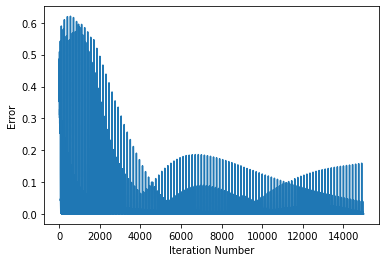

In [124]:
import matplotlib.pyplot as plt
plt.plot(loss)
plt.xlabel("Iteration Number")
plt.ylabel("Error")
plt.show()
